### Importando librerias necesarias

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split,TimeSeriesSplit
import matplotlib.pyplot as plt

### Cargamos los datos con las alfas

In [2]:
df = pd.read_csv('../spyconalfas.csv')
df

,Date,vwap,returns,alpha1,alpha2,alpha4,alpha5,alpha6,alpha7,alpha8,...,-1 day,-2 day,-4 day,-6 day,-7 day,-8 day,-9 day,-13 day,-23 day,-27 day
0,2012-10-15,119.366585,NaN,NaN,NaN,NaN,NaN,NaN,-1.00,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2012-10-16,120.576118,0.010133,NaN,NaN,NaN,NaN,NaN,-1.00,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2012-10-17,121.122925,0.004535,NaN,NaN,NaN,NaN,NaN,-1.00,NaN,...,0.010133,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2012-10-18,120.808128,-0.002599,NaN,NaN,NaN,NaN,NaN,-1.00,NaN,...,0.004535,0.010133,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2012-10-19,118.794960,-0.016664,NaN,NaN,NaN,NaN,NaN,-1.00,NaN,...,-0.002599,0.004535,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2511,2022-10-07,362.790009,-0.027894,-0.320827,0.664837,-0.555556,-0.305466,0.539493,0.25,-0.986405,...,-0.010316,-0.002328,0.026401,-0.020889,0.019676,-0.002553,-0.009893,-0.011479,-0.003773,-0.010978
2512,2022-10-10,360.019989,-0.007635,-0.443620,0.522104,-0.222222,-0.057462,0.389381,-1.00,-0.967613,...,-0.027894,-0.010316,0.030987,-0.015464,-0.020889,0.019676,-0.002553,-0.017444,0.017965,-0.007609
2513,2022-10-11,357.739990,-0.006333,-0.177368,0.448061,-0.111111,-0.018555,0.258859,-1.00,-0.566973,...,-0.007635,-0.027894,-0.002328,0.026401,-0.015464,-0.020889,0.019676,-0.008400,0.006536,0.003138
2514,2022-10-12,356.559998,-0.003298,-0.320827,0.091517,-0.222222,-0.024342,0.065365,-1.00,-0.050780,...,-0.006333,-0.007635,-0.010316,0.030987,0.026401,-0.015464,-0.020889,-0.016755,0.015535,-0.010544


In [3]:
df_copia = df.copy()

In [4]:
df_copia

,Date,vwap,returns,alpha1,alpha2,alpha4,alpha5,alpha6,alpha7,alpha8,...,-1 day,-2 day,-4 day,-6 day,-7 day,-8 day,-9 day,-13 day,-23 day,-27 day
0,2012-10-15,119.366585,NaN,NaN,NaN,NaN,NaN,NaN,-1.00,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2012-10-16,120.576118,0.010133,NaN,NaN,NaN,NaN,NaN,-1.00,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2012-10-17,121.122925,0.004535,NaN,NaN,NaN,NaN,NaN,-1.00,NaN,...,0.010133,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2012-10-18,120.808128,-0.002599,NaN,NaN,NaN,NaN,NaN,-1.00,NaN,...,0.004535,0.010133,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2012-10-19,118.794960,-0.016664,NaN,NaN,NaN,NaN,NaN,-1.00,NaN,...,-0.002599,0.004535,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2511,2022-10-07,362.790009,-0.027894,-0.320827,0.664837,-0.555556,-0.305466,0.539493,0.25,-0.986405,...,-0.010316,-0.002328,0.026401,-0.020889,0.019676,-0.002553,-0.009893,-0.011479,-0.003773,-0.010978
2512,2022-10-10,360.019989,-0.007635,-0.443620,0.522104,-0.222222,-0.057462,0.389381,-1.00,-0.967613,...,-0.027894,-0.010316,0.030987,-0.015464,-0.020889,0.019676,-0.002553,-0.017444,0.017965,-0.007609
2513,2022-10-11,357.739990,-0.006333,-0.177368,0.448061,-0.111111,-0.018555,0.258859,-1.00,-0.566973,...,-0.007635,-0.027894,-0.002328,0.026401,-0.015464,-0.020889,0.019676,-0.008400,0.006536,0.003138
2514,2022-10-12,356.559998,-0.003298,-0.320827,0.091517,-0.222222,-0.024342,0.065365,-1.00,-0.050780,...,-0.006333,-0.007635,-0.010316,0.030987,0.026401,-0.015464,-0.020889,-0.016755,0.015535,-0.010544


In [5]:
pd.to_datetime(df_copia['Date'])

0      2012-10-15
1      2012-10-16
2      2012-10-17
3      2012-10-18
4      2012-10-19
          ...    
2511   2022-10-07
2512   2022-10-10
2513   2022-10-11
2514   2022-10-12
2515   2022-10-13
Name: Date, Length: 2516, dtype: datetime64[ns]

In [6]:
df_copia = df_copia.set_index('Date')

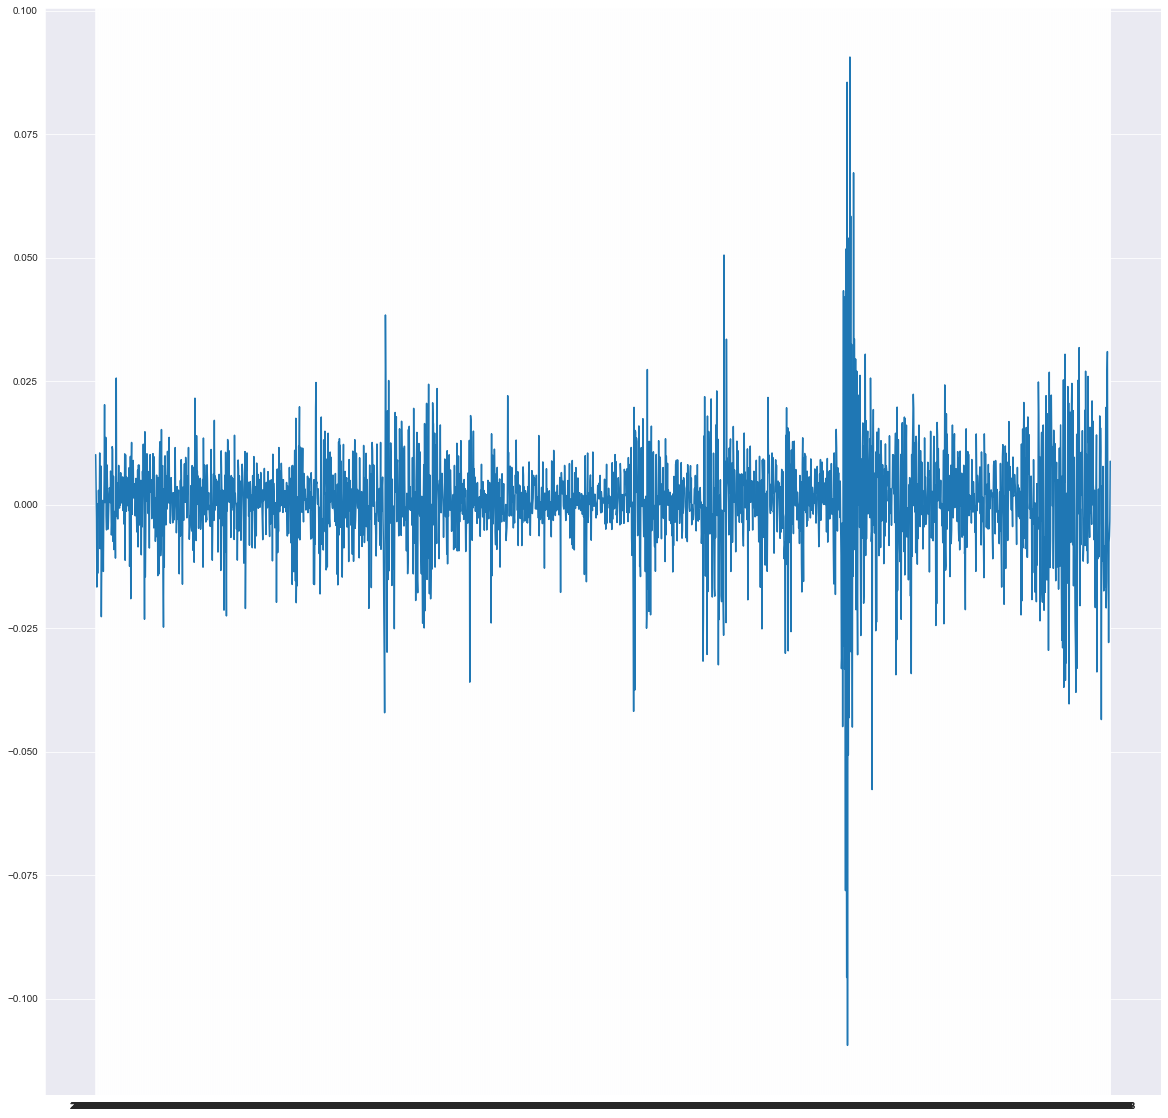

In [7]:
plt.figure(figsize=(20,20))
plt.plot(df_copia.index,df_copia.returns)

### Limpiamos los NaN, cambiamos los True/False por 1/0 y eliminamos el indice temporal

In [8]:
df.dropna(axis=1,inplace=True,how='all') # Importante primero quitar las columnas que esten enteras vacias
df.dropna(axis=0,inplace=True)
df.replace({False: 0, True: 1}, inplace=True)
df.drop('Date',axis=1,inplace=True)
df.drop(['alpha53','vwap'],axis=1,inplace=True)
df

,returns,alpha1,alpha2,alpha4,alpha5,alpha6,alpha7,alpha8,alpha9,alpha10,...,-1 day,-2 day,-4 day,-6 day,-7 day,-8 day,-9 day,-13 day,-23 day,-27 day
250,-0.007254,0.002006,0.836924,-1.000000,-0.334596,0.214036,-0.250000,-0.772891,1.049713,0.774553,...,0.003994,0.006443,0.000725,-0.008644,0.007577,-0.009221,-0.000945,0.003846,-0.002656,0.000482
251,0.013966,0.302368,0.629973,-1.000000,-0.330406,0.088929,-0.916667,-0.833267,-2.006424,0.157455,...,-0.007254,0.003994,0.021558,-0.011647,-0.008644,0.007577,-0.009221,-0.004597,0.002249,0.009576
252,0.006684,0.302368,0.546505,-1.000000,-0.335395,0.157462,-1.000000,-0.823671,-0.973633,0.275547,...,0.013966,-0.007254,0.006443,0.000725,-0.011647,-0.008644,0.007577,-0.005329,0.005787,0.007397
253,0.006754,0.302368,0.609228,-1.000000,-0.424381,0.229886,-1.000000,-0.759696,-0.990463,0.272763,...,0.006684,0.013966,0.003994,0.021558,0.000725,-0.011647,-0.008644,0.007917,0.004463,0.003138
254,0.000057,0.302368,0.414605,-1.000000,-0.420789,0.575417,-1.000000,-0.755298,-0.008408,0.507753,...,0.006754,0.006684,-0.007254,0.006443,0.021558,0.000725,-0.011647,-0.000945,0.011574,-0.002656
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2511,-0.027894,-0.320827,0.664837,-0.555556,-0.305466,0.539493,0.250000,-0.986405,10.410004,0.990855,...,-0.010316,-0.002328,0.026401,-0.020889,0.019676,-0.002553,-0.009893,-0.011479,-0.003773,-0.010978
2512,-0.007635,-0.443620,0.522104,-0.222222,-0.057462,0.389381,-1.000000,-0.967613,2.770020,0.106561,...,-0.027894,-0.010316,0.030987,-0.015464,-0.020889,0.019676,-0.002553,-0.017444,0.017965,-0.007609
2513,-0.006333,-0.177368,0.448061,-0.111111,-0.018555,0.258859,-1.000000,-0.566973,-2.279999,0.133996,...,-0.007635,-0.027894,-0.002328,0.026401,-0.015464,-0.020889,0.019676,-0.008400,0.006536,0.003138
2514,-0.003298,-0.320827,0.091517,-0.222222,-0.024342,0.065365,-1.000000,-0.050780,-1.179993,0.247714,...,-0.006333,-0.007635,-0.010316,0.030987,0.026401,-0.015464,-0.020889,-0.016755,0.015535,-0.010544


In [9]:
# alpha53 y como normalizar vwap
df.describe()

,returns,alpha1,alpha2,alpha4,alpha5,alpha6,alpha7,alpha8,alpha9,alpha10,...,-1 day,-2 day,-4 day,-6 day,-7 day,-8 day,-9 day,-13 day,-23 day,-27 day
count,2185.000000,2185.000000,2185.000000,2185.000000,2185.000000,2185.000000,2185.000000,2185.000000,2185.000000,2185.000000,...,2185.000000,2185.000000,2185.000000,2185.000000,2185.000000,2185.000000,2185.000000,2185.000000,2185.000000,2185.000000
mean,0.000428,-0.004621,0.121078,-0.641953,-0.250165,0.249921,-0.532128,-0.495146,-0.094180,0.498798,...,0.000415,0.000425,0.000429,0.000377,0.000401,0.000430,0.000447,0.000489,0.000488,0.000525
std,0.011228,0.277615,0.454392,0.331547,0.148001,0.399120,0.687058,0.298011,3.271657,0.298209,...,0.011207,0.011237,0.011246,0.011203,0.011210,0.011193,0.011160,0.011120,0.011089,0.011066
min,-0.109424,-0.443620,-0.978837,-1.000000,-0.500199,-0.885638,-1.000000,-1.000000,-20.312103,0.000398,...,-0.109424,-0.109424,-0.109424,-0.109424,-0.109424,-0.109424,-0.109424,-0.109424,-0.109424,-0.109424
25%,-0.003597,-0.320827,-0.209892,-1.000000,-0.381085,-0.023722,-1.000000,-0.760896,-1.299591,0.233002,...,-0.003576,-0.003585,-0.003585,-0.003597,-0.003623,-0.003583,-0.003576,-0.003536,-0.003536,-0.003476
50%,0.000591,0.002006,0.151539,-0.777778,-0.250399,0.285401,-1.000000,-0.490204,-0.096863,0.497018,...,0.000545,0.000585,0.000591,0.000525,0.000545,0.000630,0.000603,0.000596,0.000630,0.000652
75%,0.005485,0.302368,0.476685,-0.333333,-0.120910,0.575417,-0.083333,-0.233906,0.903351,0.763022,...,0.005447,0.005485,0.005516,0.005351,0.005447,0.005457,0.005457,0.005485,0.005442,0.005453
max,0.090603,0.302368,0.985286,-0.111111,-0.000200,0.972381,1.000000,-0.000400,28.222427,1.000000,...,0.090603,0.090603,0.090603,0.090603,0.090603,0.090603,0.090603,0.090603,0.090603,0.090603


In [10]:
Y = df['returns']
X = df.drop('returns',axis=1)

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,shuffle=False,test_size=0.2)

In [11]:
X_train

,alpha1,alpha2,alpha4,alpha5,alpha6,alpha7,alpha8,alpha9,alpha10,alpha11,...,-1 day,-2 day,-4 day,-6 day,-7 day,-8 day,-9 day,-13 day,-23 day,-27 day
250,0.002006,0.836924,-1.000000,-0.334596,0.214036,-0.250000,-0.772891,1.049713,0.774553,0.568073,...,0.003994,0.006443,0.000725,-0.008644,0.007577,-0.009221,-0.000945,0.003846,-0.002656,0.000482
251,0.302368,0.629973,-1.000000,-0.330406,0.088929,-0.916667,-0.833267,-2.006424,0.157455,0.962380,...,-0.007254,0.003994,0.021558,-0.011647,-0.008644,0.007577,-0.009221,-0.004597,0.002249,0.009576
252,0.302368,0.546505,-1.000000,-0.335395,0.157462,-1.000000,-0.823671,-0.973633,0.275547,0.857086,...,0.013966,-0.007254,0.006443,0.000725,-0.011647,-0.008644,0.007577,-0.005329,0.005787,0.007397
253,0.302368,0.609228,-1.000000,-0.424381,0.229886,-1.000000,-0.759696,-0.990463,0.272763,0.652667,...,0.006684,0.013966,0.003994,0.021558,0.000725,-0.011647,-0.008644,0.007917,0.004463,0.003138
254,0.302368,0.414605,-1.000000,-0.420789,0.575417,-1.000000,-0.755298,-0.008408,0.507753,0.535629,...,0.006754,0.006684,-0.007254,0.006443,0.021558,0.000725,-0.011647,-0.000945,0.011574,-0.002656
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2065,-0.177368,0.434530,-1.000000,-0.396049,0.099219,-1.000000,-0.824070,-0.517090,0.370577,0.883161,...,-0.001908,0.008591,0.000899,-0.003576,-0.003993,0.005592,0.001569,-0.000327,-0.001542,0.004210
2066,0.302368,0.133933,-0.888889,-0.326416,0.067705,-0.483333,-0.733707,-1.843781,0.176938,0.931727,...,0.001427,-0.001908,0.003890,-0.001685,-0.003576,-0.003993,0.005592,-0.001172,0.002785,-0.006848
2067,0.002006,0.552615,-0.222222,-0.465482,-0.169231,-0.150000,-0.156737,4.965576,0.959841,0.961783,...,0.005081,0.001427,0.008591,0.000899,-0.001685,-0.003576,-0.003993,-0.004477,-0.004427,0.005994
2068,-0.177368,0.662648,-0.555556,-0.082203,-0.164310,-0.366667,-0.171931,-2.477905,0.120080,0.855692,...,-0.013614,0.005081,-0.001908,0.003890,0.000899,-0.001685,-0.003576,0.013519,0.010937,0.016114


In [12]:
X_test

,alpha1,alpha2,alpha4,alpha5,alpha6,alpha7,alpha8,alpha9,alpha10,alpha11,...,-1 day,-2 day,-4 day,-6 day,-7 day,-8 day,-9 day,-13 day,-23 day,-27 day
2070,0.302368,0.773123,-1.000000,-0.444133,-0.348987,-0.616667,-0.880848,-5.414307,0.036978,0.565485,...,0.005979,0.006887,0.005081,-0.001908,0.008591,0.003890,0.000899,0.005592,-0.000273,0.002785
2071,0.302368,0.478266,-1.000000,-0.479648,-0.243955,-0.750000,-0.888445,-2.107208,0.877137,0.793192,...,0.014857,0.005979,-0.013614,0.001427,-0.001908,0.008591,0.003890,-0.003993,0.008618,-0.004427
2072,0.002006,0.570846,-1.000000,-0.428371,0.081076,-1.000000,-0.930828,2.507141,0.895030,0.536027,...,0.005698,0.014857,0.006887,0.005081,0.001427,-0.001908,0.008591,-0.003576,-0.002055,0.010937
2073,-0.177368,-0.827823,-0.777778,-0.438148,0.277259,-1.000000,-0.796481,-0.078003,0.483897,0.656250,...,-0.006741,0.005698,0.005979,-0.013614,0.005081,0.001427,-0.001908,-0.001685,0.002926,0.002104
2074,-0.320827,-0.865147,-1.000000,-0.405426,0.385027,-1.000000,-0.715314,-0.995117,0.271571,0.608280,...,0.000211,-0.006741,0.014857,0.006887,-0.013614,0.005081,0.001427,0.000899,-0.008969,-0.000273
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2511,-0.320827,0.664837,-0.555556,-0.305466,0.539493,0.250000,-0.986405,10.410004,0.990855,0.784235,...,-0.010316,-0.002328,0.026401,-0.020889,0.019676,-0.002553,-0.009893,-0.011479,-0.003773,-0.010978
2512,-0.443620,0.522104,-0.222222,-0.057462,0.389381,-1.000000,-0.967613,2.770020,0.106561,0.678543,...,-0.027894,-0.010316,0.030987,-0.015464,-0.020889,0.019676,-0.002553,-0.017444,0.017965,-0.007609
2513,-0.177368,0.448061,-0.111111,-0.018555,0.258859,-1.000000,-0.566973,-2.279999,0.133996,0.820661,...,-0.007635,-0.027894,-0.002328,0.026401,-0.015464,-0.020889,0.019676,-0.008400,0.006536,0.003138
2514,-0.320827,0.091517,-0.222222,-0.024342,0.065365,-1.000000,-0.050780,-1.179993,0.247714,0.592157,...,-0.006333,-0.007635,-0.010316,0.030987,0.026401,-0.015464,-0.020889,-0.016755,0.015535,-0.010544


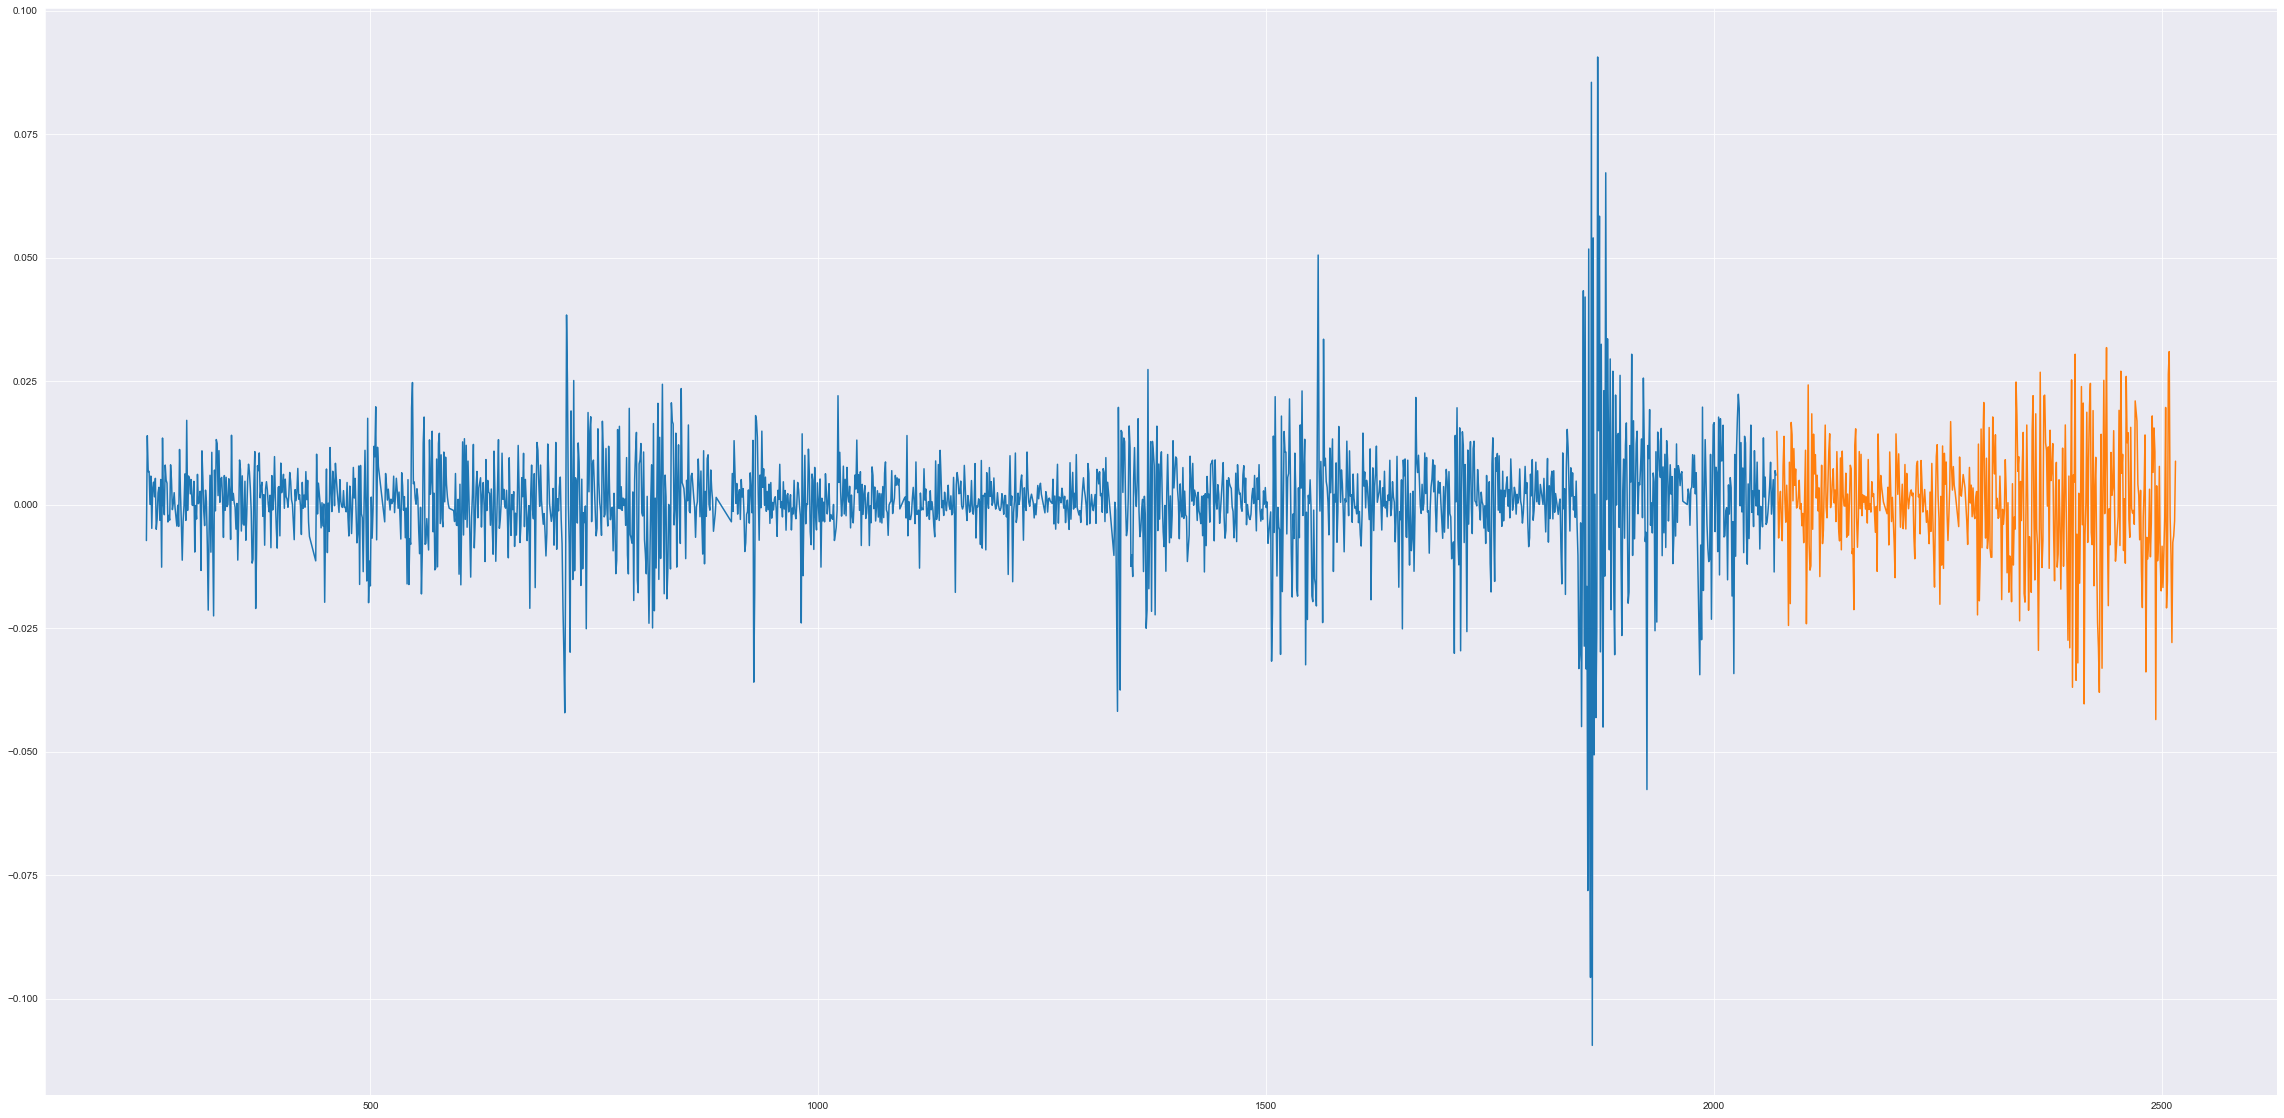

In [13]:
plt.subplots(figsize=(40,20))
plt.plot(Y_train)
plt.plot(Y_test)
plt.show()

In [14]:
tss = TimeSeriesSplit(5)

In [15]:
indices =  []
test_id = []

for train, test in tss.split(X_train):
    indices.append(train[-1])
    test_id.append(test[-1])

print(indices)
print(test_id)

[292, 583, 874, 1165, 1456]
[583, 874, 1165, 1456, 1747]


In [16]:
len(Y_train)

1748

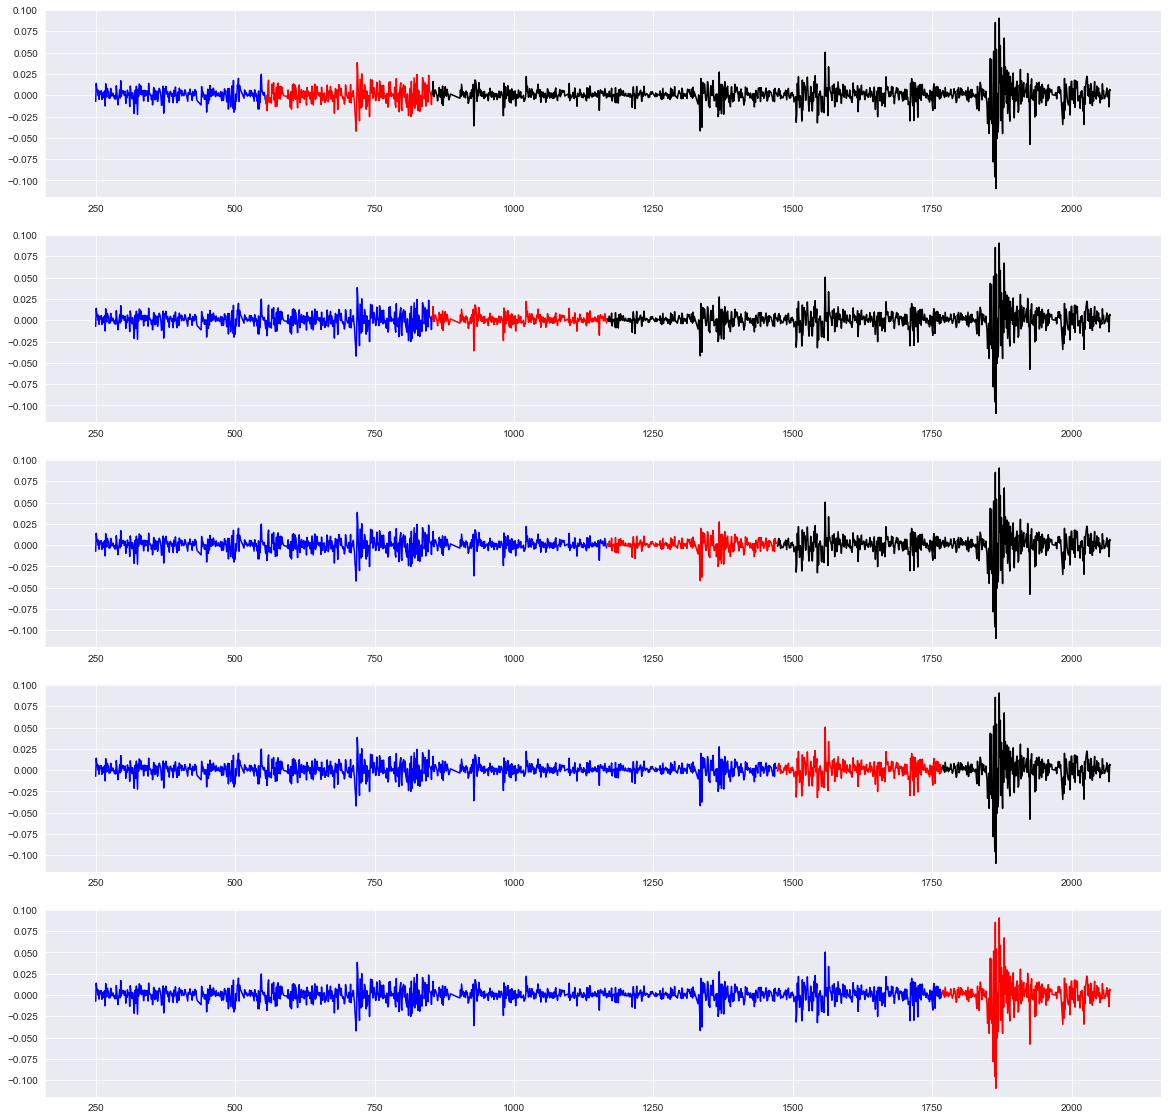

In [14]:
fig,axes = plt.subplots(5,figsize=(20,20))
axes[0].plot(Y_train[:292],'b')
axes[0].plot(Y_train[292:583],'r')
axes[0].plot(Y_train[583:],'k')

axes[1].plot(Y_train[:583],'b')
axes[1].plot(Y_train[583:874],'r')
axes[1].plot(Y_train[874:],'k')

axes[2].plot(Y_train[:874],'b')
axes[2].plot(Y_train[874:1165],'r')
axes[2].plot(Y_train[1165:],'k')

axes[3].plot(Y_train[:1165],'b')
axes[3].plot(Y_train[1165:1456],'r')
axes[3].plot(Y_train[1456:],'k')

axes[4].plot(Y_train[:1456],'b')
axes[4].plot(Y_train[1456:],'r')

plt.show()

In [27]:
Y_train

250     0.0
251     1.0
252     1.0
253     1.0
254     1.0
       ... 
2065    1.0
2066    1.0
2067    0.0
2068    1.0
2069    1.0
Name: returns, Length: 1748, dtype: float64

In [26]:
Y_train[Y_train < 0] = 0
Y_train[Y_train > 0] = 1

Alfa20, Alfa54, Alfa84

In [35]:
X_train

,alpha1,alpha2,alpha4,alpha5,alpha6,alpha7,alpha8,alpha9,alpha10,alpha11,...,-1 day,-2 day,-4 day,-6 day,-7 day,-8 day,-9 day,-13 day,-23 day,-27 day
250,0.002006,0.836924,-1.000000,-0.334596,0.214036,-0.250000,-0.772891,1.049713,0.774553,0.568073,...,0.003994,0.006443,0.000725,-0.008644,0.007577,-0.009221,-0.000945,0.003846,-0.002656,0.000482
251,0.302368,0.629973,-1.000000,-0.330406,0.088929,-0.916667,-0.833267,-2.006424,0.157455,0.962380,...,-0.007254,0.003994,0.021558,-0.011647,-0.008644,0.007577,-0.009221,-0.004597,0.002249,0.009576
252,0.302368,0.546505,-1.000000,-0.335395,0.157462,-1.000000,-0.823671,-0.973633,0.275547,0.857086,...,0.013966,-0.007254,0.006443,0.000725,-0.011647,-0.008644,0.007577,-0.005329,0.005787,0.007397
253,0.302368,0.609228,-1.000000,-0.424381,0.229886,-1.000000,-0.759696,-0.990463,0.272763,0.652667,...,0.006684,0.013966,0.003994,0.021558,0.000725,-0.011647,-0.008644,0.007917,0.004463,0.003138
254,0.302368,0.414605,-1.000000,-0.420789,0.575417,-1.000000,-0.755298,-0.008408,0.507753,0.535629,...,0.006754,0.006684,-0.007254,0.006443,0.021558,0.000725,-0.011647,-0.000945,0.011574,-0.002656
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2065,-0.177368,0.434530,-1.000000,-0.396049,0.099219,-1.000000,-0.824070,-0.517090,0.370577,0.883161,...,-0.001908,0.008591,0.000899,-0.003576,-0.003993,0.005592,0.001569,-0.000327,-0.001542,0.004210
2066,0.302368,0.133933,-0.888889,-0.326416,0.067705,-0.483333,-0.733707,-1.843781,0.176938,0.931727,...,0.001427,-0.001908,0.003890,-0.001685,-0.003576,-0.003993,0.005592,-0.001172,0.002785,-0.006848
2067,0.002006,0.552615,-0.222222,-0.465482,-0.169231,-0.150000,-0.156737,4.965576,0.959841,0.961783,...,0.005081,0.001427,0.008591,0.000899,-0.001685,-0.003576,-0.003993,-0.004477,-0.004427,0.005994
2068,-0.177368,0.662648,-0.555556,-0.082203,-0.164310,-0.366667,-0.171931,-2.477905,0.120080,0.855692,...,-0.013614,0.005081,-0.001908,0.003890,0.000899,-0.001685,-0.003576,0.013519,0.010937,0.016114


In [39]:
from sklearn.preprocessing import StandardScaler

X_train[['alpha20', 'alpha54','alpha84']] = StandardScaler().fit_transform(X_train[['alpha20', 'alpha54','alpha84']])

In [43]:
X_train

,alpha1,alpha2,alpha4,alpha5,alpha6,alpha7,alpha8,alpha9,alpha10,alpha11,...,-1 day,-2 day,-4 day,-6 day,-7 day,-8 day,-9 day,-13 day,-23 day,-27 day
250,0.002006,0.836924,-1.000000,-0.334596,0.214036,-0.250000,-0.772891,1.049713,0.774553,0.568073,...,0.003994,0.006443,0.000725,-0.008644,0.007577,-0.009221,-0.000945,0.003846,-0.002656,0.000482
251,0.302368,0.629973,-1.000000,-0.330406,0.088929,-0.916667,-0.833267,-2.006424,0.157455,0.962380,...,-0.007254,0.003994,0.021558,-0.011647,-0.008644,0.007577,-0.009221,-0.004597,0.002249,0.009576
252,0.302368,0.546505,-1.000000,-0.335395,0.157462,-1.000000,-0.823671,-0.973633,0.275547,0.857086,...,0.013966,-0.007254,0.006443,0.000725,-0.011647,-0.008644,0.007577,-0.005329,0.005787,0.007397
253,0.302368,0.609228,-1.000000,-0.424381,0.229886,-1.000000,-0.759696,-0.990463,0.272763,0.652667,...,0.006684,0.013966,0.003994,0.021558,0.000725,-0.011647,-0.008644,0.007917,0.004463,0.003138
254,0.302368,0.414605,-1.000000,-0.420789,0.575417,-1.000000,-0.755298,-0.008408,0.507753,0.535629,...,0.006754,0.006684,-0.007254,0.006443,0.021558,0.000725,-0.011647,-0.000945,0.011574,-0.002656
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2065,-0.177368,0.434530,-1.000000,-0.396049,0.099219,-1.000000,-0.824070,-0.517090,0.370577,0.883161,...,-0.001908,0.008591,0.000899,-0.003576,-0.003993,0.005592,0.001569,-0.000327,-0.001542,0.004210
2066,0.302368,0.133933,-0.888889,-0.326416,0.067705,-0.483333,-0.733707,-1.843781,0.176938,0.931727,...,0.001427,-0.001908,0.003890,-0.001685,-0.003576,-0.003993,0.005592,-0.001172,0.002785,-0.006848
2067,0.002006,0.552615,-0.222222,-0.465482,-0.169231,-0.150000,-0.156737,4.965576,0.959841,0.961783,...,0.005081,0.001427,0.008591,0.000899,-0.001685,-0.003576,-0.003993,-0.004477,-0.004427,0.005994
2068,-0.177368,0.662648,-0.555556,-0.082203,-0.164310,-0.366667,-0.171931,-2.477905,0.120080,0.855692,...,-0.013614,0.005081,-0.001908,0.003890,0.000899,-0.001685,-0.003576,0.013519,0.010937,0.016114


In [57]:
X_train['alpha25']

250     0.810973
251     0.291149
252     0.367241
253     0.343212
254     0.528634
          ...   
2065    0.234281
2066    0.126151
2067    0.949139
2068    0.080096
2069    0.034441
Name: alpha25, Length: 1748, dtype: float64

In [46]:
X_train['alpha20'].describe()

count    1.748000e+03
mean     1.625956e-17
std      1.000286e+00
min     -3.367252e+00
25%     -4.150849e-01
50%      4.311527e-01
75%      7.478735e-01
max      8.445187e-01
Name: alpha20, dtype: float64

In [50]:
Y_test[Y_test < 0] = 0
Y_test[Y_test > 0] = 1

In [45]:
import xgboost as xgb



modelo = xgb.XGBClassifier()
modelo.fit(X_train,Y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [52]:
modelo.score(X_test,Y_test)

1.0

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

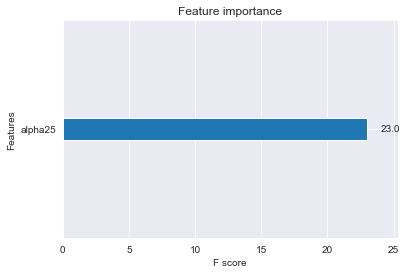

In [58]:
from xgboost import plot_importance
plot_importance(modelo, max_num_features = None)

In [ ]:
def walk_forward_validation(data, n_test, cfg):
	predictions = list()
	# split dataset
	train, test = train_test_split(data, n_test)
	# fit model
	model = model_fit(train, cfg)
	# seed history with training dataset
	history = [x for x in train]
	# step over each time-step in the test set
	for i in range(len(test)):
		# fit model and make forecast for history
		yhat = model_predict(model, history, cfg)
		# store forecast in list of predictions
		predictions.append(yhat)
		# add actual observation to history for the next loop
		history.append(test[i])
	# estimate prediction error
	error = measure_rmse(test, predictions)
	print(' > %.3f' % error)
	return error

In [ ]:
def winloss(s):
	if ((s['retorno diario'] > 0) and (s['Prediccion'] > 0)) or ((s['retorno diario'] < 0) and (s['Prediccion'] < 0)):
		return 'win'
	else:
		return 'loss'


def longshort(s):
	if (s['Prediccion'] > 0):
		return 'Long'
	else:
		return 'Short'


retornos['W/L'] = retornos.apply(winloss, axis=1)
retornos['S/L'] = retornos.apply(longshort, axis=1)